### New York City Airbnb data
#### EDA y limpieza de datos

In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [53]:
airbnb = pd.read_csv('../data/raw/AB_NYC_2019.csv')

In [ ]:
Chequeamos la cantidad de observaciones del dataset para tener idez del tamaño.

In [83]:

len(airbnb)

48895

In [ ]:
Examinamos los cabezales del dataset

In [84]:

airbnb.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0  149.0               1                  9  2018-10-19               0.21   
1  225.0               1                 45  2019-05-21               0.38   
2  150.0               3                  0         NaT                NaN   

   calculated_host_listings_count  availability_365 Price_category  
0                               6               365        q2 - q3  
1                               2               355       q3 - max  
2                               1               365        q2 - q3

In [ ]:
Listamos los tipos de cada columna.

In [85]:

airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
Price_category                          category
dtype: object

In [56]:
warnings.filterwarnings('ignore')

**Ver las variables y una muestra de su contenido**

In [57]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
After loading the dataset in and from the head of AB_2019_NYC dataset we can see a number of things. These 16 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.
Looking to find out first what columns have null values
Using 'sum' function will show us how many nulls are found in each column in dataset

In [87]:

airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
Price_category                        0
dtype: int64

Let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this servce

In [90]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [91]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [58]:
airbnb.sample(5)

id                                               name   host_id  \
23985  19343737   Spacious private BR-PRIME BUSHWICK. Roof access!  80603182   
28942  22295591                     Huge Luxury Brooklyn Apartment  70079814   
39976  31056122  Private Bath, Private Room 2 blocks from NR tr...   6675227   
9425    7227418          All Nations Home II - pvt br. 2 twin beds   1639755   
6764    4845237                                East Village Beauty  12485770   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
23985     Daria            Brooklyn        Bushwick  40.70160  -73.91974   
28942     Natia            Brooklyn  Sheepshead Bay  40.60583  -73.95165   
39976     Jason            Brooklyn     Sunset Park  40.65035  -74.00974   
9425    Adriana            Brooklyn   Fort Hamilton  40.61999  -74.03181   
6764     Raanan           Manhattan    East Village  40.72829  -73.98072   

             room_type  price  minimum_nights  number_of_reviews last_review  \
23985     Private room     40               2                  2  2018-05-17   
28942  Entire home/apt    200               3                  4  2019-01-02   
39976     Private room     75               2                  2  2019-01-14   
9425      Private room     55               1                 34  2019-06-16   
6764   Entire home/apt    110              30                  8  2018-08-14   

       reviews_per_month  calculated_host_listings_count  availability_365  
23985               0.09                               1                 0  
28942               0.26                               1                 0  
39976               0.32                               1                16  
9425                0.80                               2               281  
6764                0.18                               9               280

**Ajustar el tipo de cada variable**

In [59]:
airbnb['last_review'] = airbnb['last_review'].astype('datetime64[ns]')

In [60]:
airbnb=airbnb.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})

**Ver un resumen de las variables numéricas**

**Ubicación de los alojamientos**

In [61]:
airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

**Observaciones:**

- Los valores máximos y mínimos de latitud y longitud son correctos para la Ciudad de Nueva York. --> Ver esto en un mapa.

- El precio mínimo es 0. --> Sustituir precio 0 por un promedio para el tipo de alojamiento y distrito.

- Precio máximo de 10000 llama la atención, pero podría ser correcto. --> Revisar si los precios más altos son razonables para el tipo de alojamiento y zona.

- Es razonable que el mínimo de noches sea 1, pero un mínimo de 1250 noches no parece ser correcto. --> Decidir qué hacer con este y otros posibles valores extremos, en función del análisis que se haga sobre esta variable.

- La cantidad de reviews va de 0 a 629. Sin embargo la cantidad mínima de reviews por mes es 0.01. --> Revisar si esto tiene que ver con el hecho de que hay valores nulos en la cantidad de reviews por mes.

- calculated_host_listings_count corresponde a la cantidad de alojamientos que tiene un mismo host. Los valores más comunes son 1 y 2, el máximo es 327. --> Buscar características particulares de los alojamientos de los hosts que tienen mayor cantidad.

- availability_365 parece ser la disponibilidad en el año. En tal caso, llama la atención que al menos el 25% de los alojamientos no están disponibles --> Buscar características particulares de los alojamientos que no están disponibles

In [92]:


#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')



In [93]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

Host_ID  P_Count
0  219517861      327
1  107434423      232
2   30283594      121
3  137358866      103
4   16098958       96
5   12243051       96
6   61391963       91
7   22541573       87
8  200380610       65
9    7503643       52

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

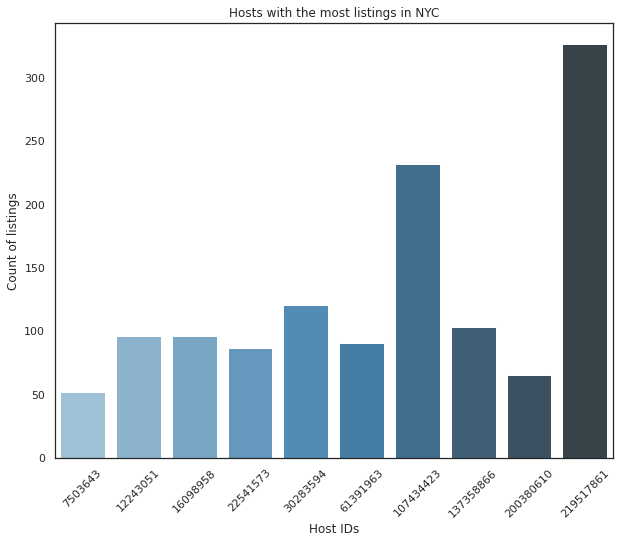

In [94]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Interesting, we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.


In [95]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [96]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min        10.0       10.0     10.0           13.0    10.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

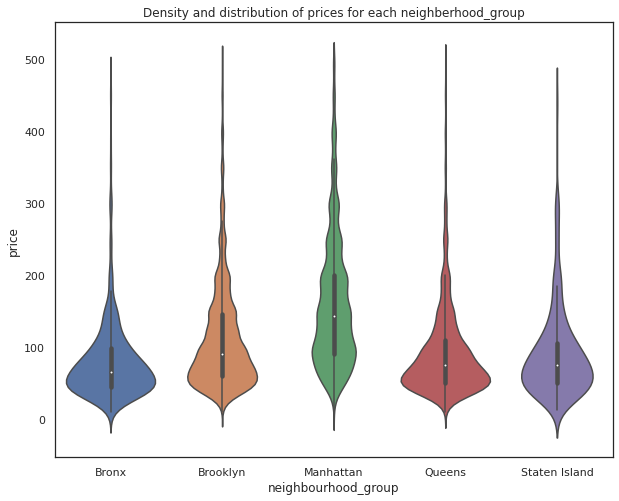

In [97]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.


In [98]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

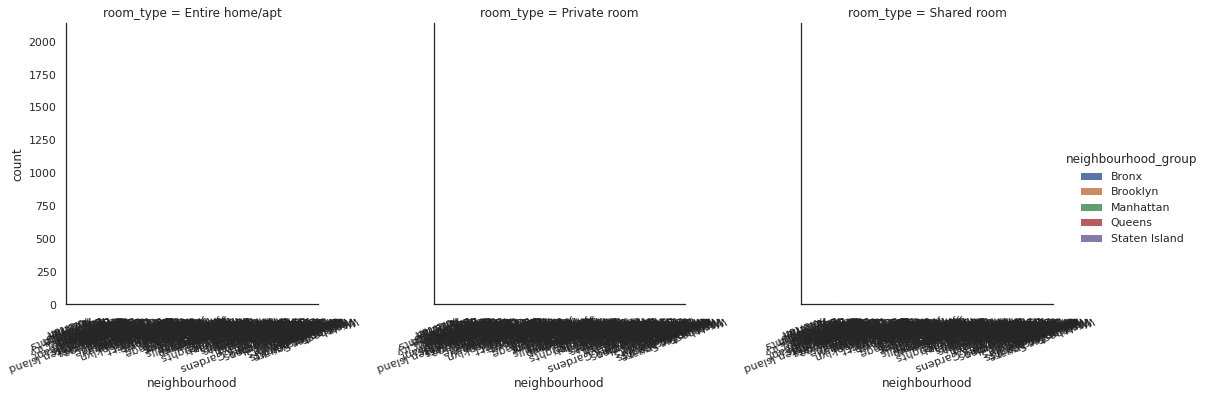

In [102]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=200)

In [103]:
Long = -73.95
Lat = 40.73
locations = list(zip(airbnb.latitude, airbnb.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=10)
FastMarkerCluster(data=locations).add_to(map1)
map1

**Sustituir precio 0 por un promedio para el tipo de alojamiento y barrio.**

In [104]:
# Obtener el precio promedio (excluyendo los valores nulos) por zona y tipo de alojamiento
df_precio_no_nulo = airbnb[airbnb['price'] > 0]
df_precio_promedio = df_precio_no_nulo.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
pd.DataFrame(df_precio_promedio).sort_values(by='room_type')
dict_precios_promedio = df_precio_promedio.to_dict()

In [64]:
def precio_nulo_a_promedio(fila):
	if fila['price'] > 0:
		return fila['price']
	else:
		return dict_precios_promedio[fila['room_type'], fila['neighbourhood_group']]

In [65]:
airbnb['price'] = airbnb.apply(precio_nulo_a_promedio, axis=1)

**Boxplot de precios**

In [66]:
fig = px.box(airbnb, x='price')
fig.show()

Hay valores muy por fuera del rango no atípico.
La cantidad de valores atípicos va disminuyendo al aumentar el precio.

**Histograma de precios** (sin considerar outliers)

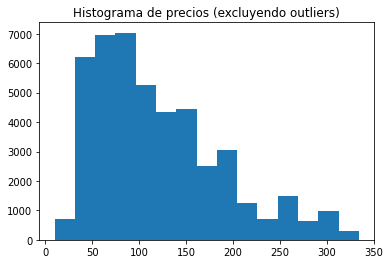

In [67]:
q1_pr = airbnb['price'].quantile(0.25)
q3_pr =airbnb['price'].quantile(0.75)
IQR_pr = q3_pr - q1_pr
min_pr = q1_pr - 1.5*IQR_pr
max_pr = q3_pr + 1.5*IQR_pr
df_sin_outliers = airbnb[(airbnb['price']>=min_pr) & (airbnb['price']<=max_pr)]
plt.hist(df_sin_outliers.price, bins=15)
plt.title('Histograma de precios (excluyendo outliers)')
plt.show()

**Análisis del precio promedio por tipo de alojamiento y distrito**

In [68]:
df_precio_promedio = airbnb.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
pd.DataFrame(df_precio_promedio).sort_values(by=['room_type', 'price'])

price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.506596
                Queens               147.050573
                Staten Island        173.846591
                Brooklyn             178.346202
                Manhattan            249.257994
Private room    Staten Island         62.292553
                Bronx                 66.890937
                Queens                71.762456
                Brooklyn              76.545428
                Manhattan            116.776622
Shared room     Brooklyn              50.773723
                Staten Island         57.444444
                Bronx                 59.800000
                Queens                69.020202
                Manhattan             88.977083

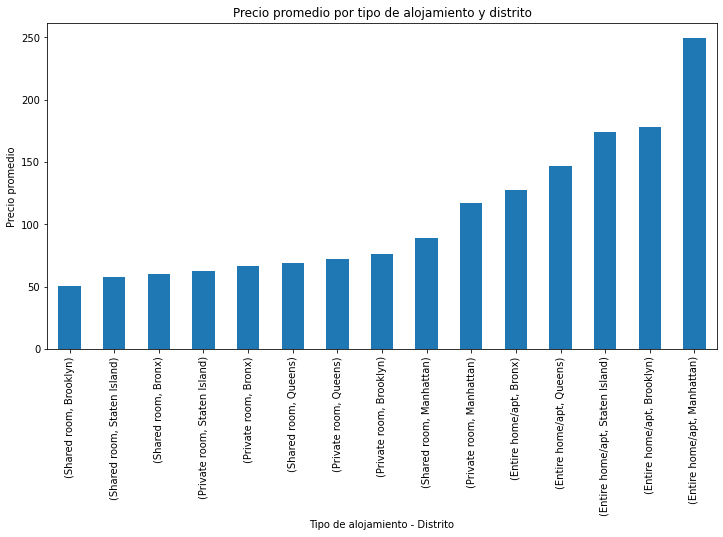

In [69]:
plt.figure(figsize=(12,6))
df_precio_promedio.plot(kind='bar')
plt.title('Precio promedio por tipo de alojamiento y distrito')
plt.ylabel('Precio promedio')
plt.xlabel('Tipo de alojamiento - Distrito')
plt.show()

Para todos los distritos el precio promedio para una habitación compartida es menor que el precio promedio para una habitación privada, y este a su vez es menor que el precio de un apartamento entero.

Para todos los tipos de habitación el precio promedio es más alto en Manhattan que en los otros distritos. 

**Análisis del precio según la ubicación**

In [70]:
q1_pr = airbnb['price'].quantile(q=0.25)
q2_pr = airbnb['price'].quantile(q=0.5)
q3_pr = airbnb['price'].quantile(q=0.75)

def categoria_precio(precio):
  if precio <= q1_pr:
    return 'min - q1'
  elif precio <= q2_pr:
    return 'q1 - q2'
  elif precio <= q3_pr:
    return 'q2 - q3'
  else:
    return 'q3 - max'

airbnb['Price_category'] = airbnb['price'].apply(categoria_precio).astype('category')

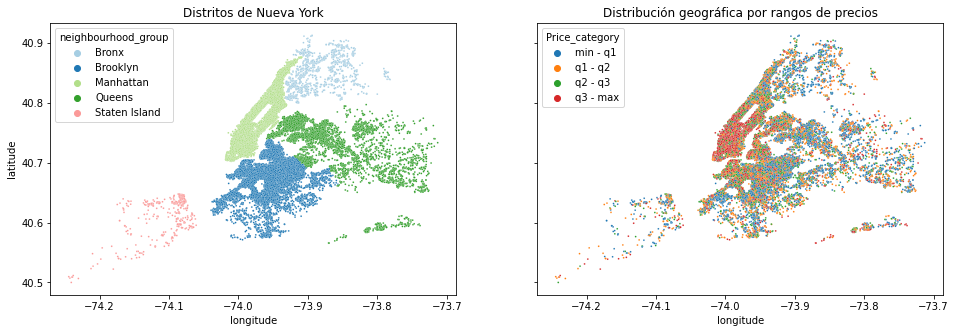

In [71]:
plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.neighbourhood_group, s=3, palette='Paired')
plt.title('Distritos de Nueva York')
plt.subplot(1, 2, 2)
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.Price_category, hue_order=['min - q1', 'q1 - q2', 'q2 - q3', 'q3 - max'], s=3)
plt.title('Distribución geográfica por rangos de precios')
plt.show()

Los precios más altos (rojo) se concentran en el extremo sur de Manhattan. Los precios intermedios (amarillo, verde) se ubican sobre todo en zonas aledañas a ésta. En líneas generales, el precio va disminuyendo (mayor proporción de azul) a medida que aumenta la distancia a esta zona central. 

**Análisis de precios en Manhattan**

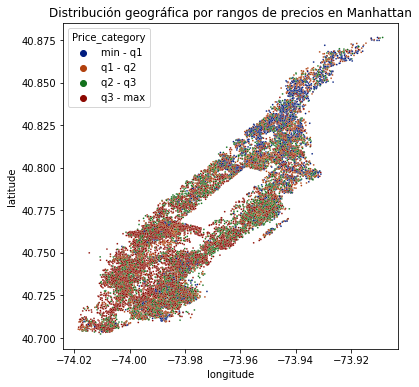

In [72]:
df_manhattan = airbnb[airbnb['neighbourhood_group']=='Manhattan']
df_manhattan['Price_category'] = df_manhattan['price'].apply(categoria_precio).astype('category')

plt.figure(figsize=(6, 6))
sns.scatterplot(x=df_manhattan.longitude, y=df_manhattan.latitude, hue=df_manhattan.Price_category, hue_order=['min - q1', 'q1 - q2', 'q2 - q3', 'q3 - max'], s=3, palette='dark')
plt.title('Distribución geográfica por rangos de precios en Manhattan')
plt.show()

# Los rangos de precios son dentro de Manhattan (el máximo es el máximo para Manhattan, no para todos los distritos)

En Manhattan se observa un gradiente en los precios, siendo más altos (en general) en los barrios del sur que en los del norte.

**Ubicación correspondiente a los precios atípicos**

In [73]:
df_outliers = airbnb[(airbnb['price']>=max_pr) | (airbnb['price']<=min_pr)]

df_outliers['Categoria_outliers_precio'] = 'Precios más altos (outliers)'
df_outliers['Categoria_outliers_precio'] = df_outliers['Categoria_outliers_precio'].astype('category')

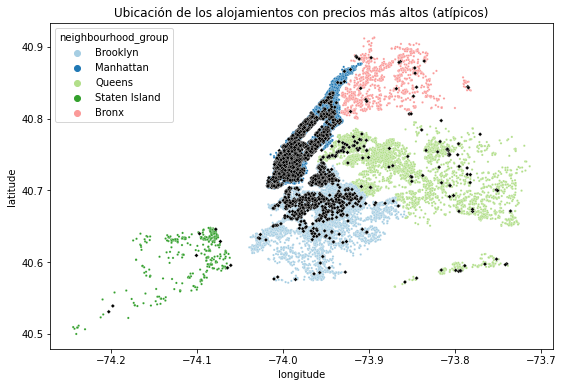

In [74]:
color = ['k']

plt.figure(figsize=(9,6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=df.neighbourhood_group, s=5, palette='Paired')
sns.scatterplot(x=df_outliers.longitude, y=df_outliers.latitude, hue=df_outliers.Categoria_outliers_precio, palette=color, s=8, marker='D', legend=False)
plt.title('Ubicación de los alojamientos con precios más altos (atípicos)')
plt.show()

Los precios que se salen del rango típico (indicados en negro) se concentran en el extremo sur de Manhattan y zonas aledañas, lo cual coincide con el plot anterior. 
Además son las zonas con mayor densidad de alojamientos en general, por lo tanto es razonable esperar que también haya mayor densidad de alojamientos con precios altos.

**Tipo de alojamiento correspondiente a los precios atípicos**

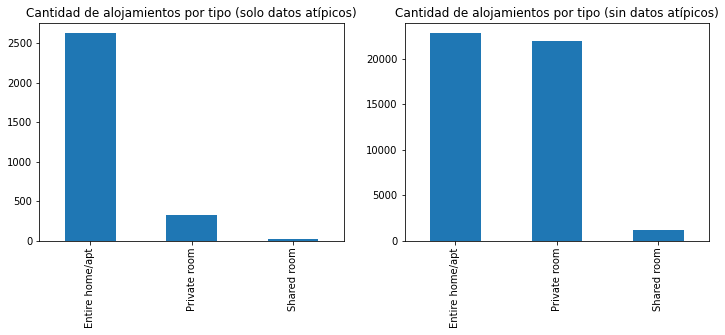

In [75]:
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
df_outliers['room_type'].value_counts().plot(kind='bar')
plt.title('Cantidad de alojamientos por tipo (solo datos atípicos)')
plt.subplot(1, 2, 2)
df_sin_outliers['room_type'].value_counts().plot(kind='bar')
plt.title('Cantidad de alojamientos por tipo (sin datos atípicos)')
plt.show()

La proporción de apartamentos o casas es mucho mayor para los outliers que para el resto de datos. Esto significa que el precio tan elevado no depende solo de la ubicación sino también del tipo de alojamiento.

**Análisis de valores atípicos de mínimo de noches**

In [76]:
fig = px.box(airbnb, x='minimum_nights')
fig.show()

**Análisis de reviews**

In [ ]:
print(f"Hay {len(airbnb.loc[airbnb['number_of_reviews']==0])} filas con 0 reviews y {airbnb['reviews_per_month'].isna().sum()} filas con nan en reviews por mes")

Hay 10052 filas con 0 reviews y 10052 filas con nan en reviews por mes


La cantidad de filas en las cuales hay 0 reviews es igual a la cantidad de filas que tienen nan en reviews por mes. Esto parece indicar que nan debería ser 0 en realidad.
Para confirmar que estos valores se corresponden:

In [ ]:
airbnb.loc[airbnb['number_of_reviews']==0]['reviews_per_month'].isna().sum()

10052

Como efectivamente coincide, cambio los nan de reviews_per_month por 0

In [ ]:
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

In [ ]:
np.all(np.isnat(np.array(airbnb.loc[airbnb['number_of_reviews']==0]['last_review'])))

True

En todos los casos en los que hay 0 reviews, no hay fecha de last_review.
Faltaría ver que se cumpla que en todos los casos que no hay fecha de last_review es porque hay 0 reviews. Para esto alcanza con ver que hay la misma cantidad de naT que de 0 reviews:

In [ ]:

np.size(np.isnat(np.array(airbnb.loc[airbnb['number_of_reviews']==0]['last_review']))) == len(airbnb.loc[airbnb['number_of_reviews']==0])

True

Se puede afirmar entonces que no falta ningún dato para la fecha de última review, los casos en los que no hay un valor es porque no tiene reviews.

**Histograma de total de reviews por host** 

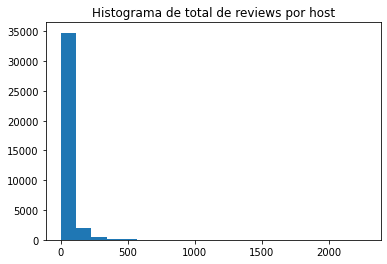

In [ ]:
df_reviews = df.groupby('host_id').agg({'number_of_reviews': np.sum, 'id': pd.Series.nunique})
pd.DataFrame(df_reviews)

plt.hist(df_reviews['number_of_reviews'], bins=20)
plt.title('Histograma de total de reviews por host')
plt.show()

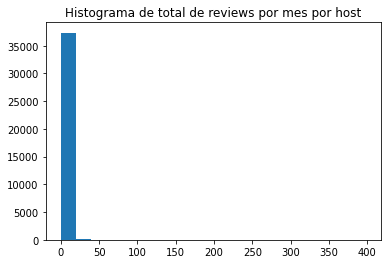

In [ ]:
df_reviews_month = df.groupby('host_id').agg({'reviews_per_month': np.sum, 'id': pd.Series.nunique})
pd.DataFrame(df_reviews_month)

plt.hist(df_reviews_month['reviews_per_month'], bins=20)
plt.title('Histograma de total de reviews por mes por host')
plt.show()

A excepción del caso del host con mayor cantidad de alojamientos, un patrón similar al anterior se ve en las reviews por mes.

**Ubicación de los alojamientos no disponibles**

In [ ]:
df_no_disponible = airbnb[airbnb['availability_365']==0]
df_no_disponible['Categoria_disponibilidad'] = 'No disponible'
df_no_disponible['Categoria_disponibilidad'] = df_no_disponible['Categoria_disponibilidad'].astype('category')

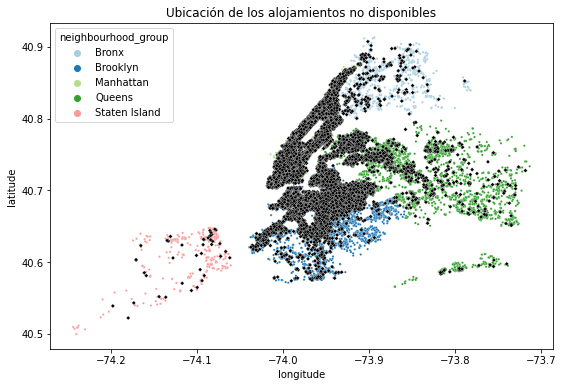

In [ ]:
color = ['k']

plt.figure(figsize=(9,6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.neighbourhood_group, s=5, palette='Paired')
sns.scatterplot(x=df_no_disponible.longitude, y=df_no_disponible.latitude, hue=df_no_disponible.Categoria_disponibilidad, palette=color, s=8, marker='D', legend=False)
plt.title('Ubicación de los alojamientos no disponibles')
plt.show()

La distribución se ve similar a la de los precios más altos. Para verlo mejor se puede ver ambas cosas en un mismo plot:

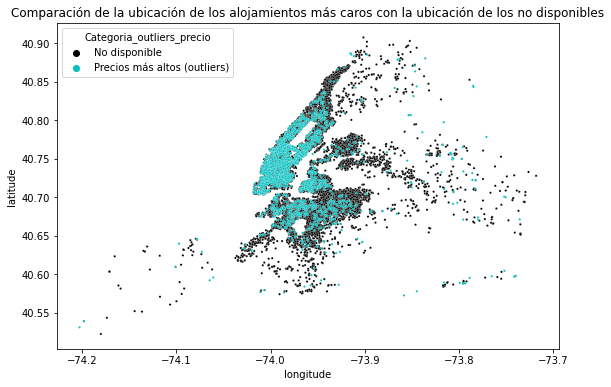

In [ ]:
color = ['k']
color2 = ['c']

plt.figure(figsize=(9,6))
sns.scatterplot(x=df_no_disponible.longitude, y=df_no_disponible.latitude, hue=df_no_disponible.Categoria_disponibilidad, palette=color, s=5, legend=True)
sns.scatterplot(x=df_outliers.longitude, y=df_outliers.latitude, hue=df_outliers.Categoria_outliers_precio, palette=color2, s=5, legend=True)
plt.title('Comparación de la ubicación de los alojamientos más caros con la ubicación de los no disponibles')
plt.show()

**Comparación del precio promedio (por tipo de alojamiento y distrito) según disponibilidad**

In [ ]:
df_no_disponible = df[df['availability_365']==0]
df_precio_promedio_no_disponible = df_no_disponible.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
pd.DataFrame(df_precio_promedio_no_disponible).sort_values(by=['room_type', 'price'])

price
room_type       neighbourhood_group            
Entire home/apt Bronx                105.737705
                Queens               123.507326
                Staten Island        155.291667
                Brooklyn             161.987668
                Manhattan            215.573560
Private room    Bronx                 67.245283
                Brooklyn              70.690499
                Staten Island         74.588235
                Queens                80.707379
                Manhattan            100.047188
Shared room     Staten Island         20.000000
                Bronx                 52.800000
                Brooklyn              60.980952
                Queens                85.222222
                Manhattan             99.381944

In [ ]:
df_disponible =airbnb[airbnb['availability_365']>0]
df_precio_promedio_disponible = df_disponible.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
pd.DataFrame(df_precio_promedio_disponible).sort_values(by=['room_type', 'price'])

price
room_type       neighbourhood_group            
Entire home/apt Bronx                131.682390
                Queens               155.343871
                Staten Island        176.776316
                Brooklyn             187.740505
                Manhattan            268.215614
Private room    Staten Island         61.070175
                Bronx                 66.822145
                Queens                69.043697
                Brooklyn              80.753262
                Manhattan            127.971560
Shared room     Brooklyn              47.293985
                Bronx                 61.200000
                Staten Island         62.125000
                Queens                65.419753
                Manhattan             84.517857

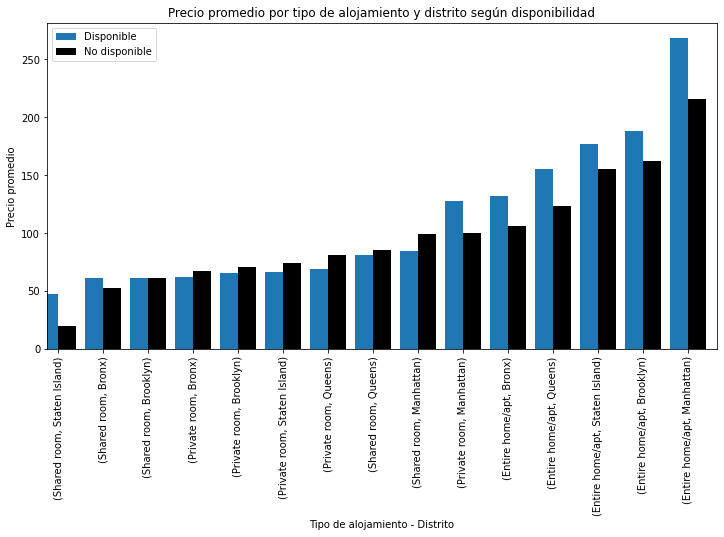

In [ ]:
plt.figure(figsize=(12,6))
df_precio_promedio_disponible.plot(kind='bar', width=-0.4, align='edge')
df_precio_promedio_no_disponible.plot(kind='bar', color='k', width=0.4, align='edge')
plt.legend(['Disponible', 'No disponible'])
plt.title('Precio promedio por tipo de alojamiento y distrito según disponibilidad')
plt.ylabel('Precio promedio')
plt.xlabel('Tipo de alojamiento - Distrito')
plt.show()

En el extremo de los precios más altos el precio promedio de los alojamientos no disponibles es menor que el de los que sí están disponibles. Esto puede deberse a un intento de atraer la atención hacia los alojamientos más caros, haciéndolos parecer menos costosos de lo que realmente son.
Otra posibilidad es que los precios estén desactualizados debido a que el alojamiento lleva mucho tiempo sin estar disponible.

In [78]:
df_no_disponible['last_review'].sample(30)

26949   2017-12-03
15327   2016-10-23
24560   2017-09-04
4742    2017-03-04
11476   2018-01-03
34956   2018-12-10
26444   2018-02-06
14157          NaT
25177   2017-11-09
23960          NaT
8767    2018-02-16
13848          NaT
965     2015-05-15
17614   2017-04-16
39515   2019-05-25
13035   2015-12-26
27523   2018-06-24
26147          NaT
20782          NaT
24183   2019-05-11
26315          NaT
30145   2018-12-31
33524   2019-01-03
961     2018-12-04
11265          NaT
20057   2017-03-17
16527          NaT
641     2019-01-01
3682           NaT
18557   2018-10-09
Name: last_review, dtype: datetime64[ns]

Conclusión Final:
this Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. 
First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. 
After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. 
Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. 
Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. 
Lastly, we found the most reviewed listings and analyzed some additional attributes. 
For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; 
addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. 
Overall, we discovered a very good number of interesting relationships between features and explained each step of the process.